<a href="https://colab.research.google.com/github/NarendarB0152/DataScience/blob/main/DL/ANNvsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test=y_test.reshape(-1,)

In [12]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

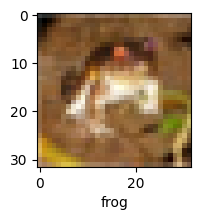

In [14]:
plot_sample(X_train,y_train,0)

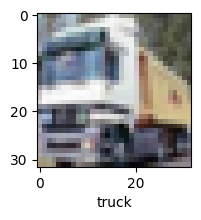

In [15]:
plot_sample(X_train,y_train,1)

In [16]:
X_train=X_train/255.0
X_test=X_test/255.0

In [17]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 79ms/step - accuracy: 0.3028 - loss: 1.9357
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 81ms/step - accuracy: 0.4180 - loss: 1.6494
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 86ms/step - accuracy: 0.4510 - loss: 1.5539
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 82ms/step - accuracy: 0.4717 - loss: 1.4954
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 83ms/step - accuracy: 0.4961 - loss: 1.4265


In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.50      0.55      1000
           1       0.66      0.52      0.58      1000
           2       0.39      0.24      0.30      1000
           3       0.47      0.11      0.18      1000
           4       0.32      0.57      0.41      1000
           5       0.42      0.32      0.36      1000
           6       0.55      0.40      0.47      1000
           7       0.34      0.76      0.47      1000
           8       0.70      0.53      0.61      1000
           9       0.50      0.65      0.57      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.3444 - loss: 1.7657
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.5888 - loss: 1.1755
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.6450 - loss: 1.0221
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.6727 - loss: 0.9429
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.6931 - loss: 0.8826
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.7095 - loss: 0.8286
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.7246 - loss: 0.7968
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7425 - loss: 0.7427
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7524 - loss: 0.7161
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7641 - loss: 0.6784


In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6890 - loss: 0.9267


[0.9278668165206909, 0.6912999749183655]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[3.25216060e-05, 4.18437194e-05, 5.55285020e-03, 9.31804597e-01,
        1.68842042e-03, 9.25828610e-03, 4.07963991e-02, 3.61674392e-05,
        1.07811298e-02, 7.62032914e-06],
       [2.02292781e-02, 1.08744577e-01, 1.43658766e-03, 3.00082931e-04,
        4.86555218e-05, 1.01960095e-05, 1.33132482e-06, 5.87515933e-05,
        7.92795300e-01, 7.63751715e-02],
       [1.21517748e-01, 1.17372990e-01, 7.48727657e-03, 3.78778428e-02,
        2.81281024e-02, 5.82638290e-03, 4.60080948e-04, 2.56860815e-02,
        5.16313016e-01, 1.39330387e-01],
       [8.20038855e-01, 1.55351637e-02, 2.38286387e-02, 1.57722719e-02,
        4.07822290e-03, 6.09258132e-04, 3.59392376e-03, 1.84826972e-03,
        1.14178307e-01, 5.17021574e-04],
       [1.13835017e-06, 3.18825078e-05, 2.84219198e-02, 5.82834780e-02,
        2.72310674e-01, 2.94879358e-03, 6.37674868e-01, 1.77528545e-05,
        3.09327675e-04, 1.03039625e-07]], dtype=float32)

In [23]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

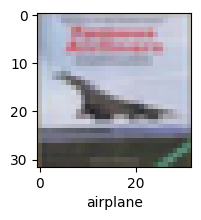

In [25]:
plot_sample(X_test,y_test,3)

In [26]:
classes[y_classes[3]]

'airplane'